In [0]:
import pandas as pd
import string
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

#DataFrameVis = pd.read_json('fake_news.json', lines=True)
DataFrame = pd.read_json('fake_news.json', lines=True)
check_data = DataFrame.head(10);
check_data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [0]:
#Check for null values
print("Null values present?\n",DataFrame.isnull().any(axis = 0))

DataFrame['headline'] = DataFrame['headline'].apply(lambda word: word.lower())
#DataFrame['headline'] = DataFrame['headline'].apply(lambda word: word.strip(string.punctuation))

import re
#print(any(DataFrame['headline']=='report: make it stop' for sd in DataFrame['headline']))

# Replacing special symbols and digits in headline column
DataFrame['headline'] = DataFrame['headline'].apply(lambda word : re.sub('[^a-zA-Z]', ' ', word))

Null values present?
 is_sarcastic    False
headline        False
article_link    False
dtype: bool


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Fakse news word frequencies excluding stopwords:
        Frequency
Word             
man          1284
new          1004
report        516
area          490
nation        389
woman         387
trump         386
year          343
one           319
time          309
old           298
day           297
still         251
u             245
study         242
like          241
first         230
get           229
back          228
family        212


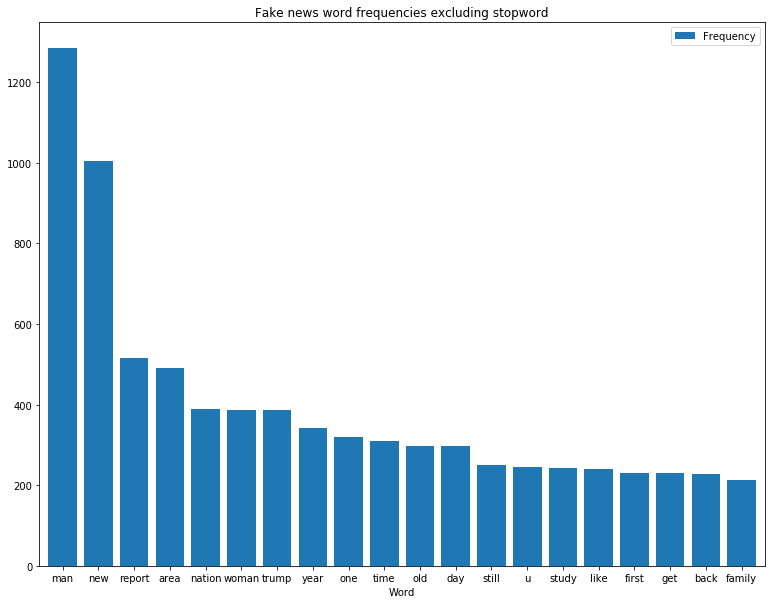

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import nltk 
from collections import Counter
nltk.download('stopwords')
top_N = 20
StopWords = nltk.corpus.stopwords.words('english')

#Creating the Regex for stopwords
RegexStopWords = r'\b(?:{})\b'.format('|'.join(StopWords))

# Replacing  "|" to ' ' and removing all stopwords
FakeDataFrame = DataFrame.loc[DataFrame['is_sarcastic'] == 1]
Words = (FakeDataFrame.headline
           .str.lower()
           .replace([r'\|', RegexStopWords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
FakeResult = pd.DataFrame(Counter(Words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print('Fakse news word frequencies excluding stopwords:')
print('=' * 60)
print(FakeResult)
print('=' * 60)
# plot
FakeResult.plot.bar(title= 'Fake news word frequencies excluding stopword',rot=0, figsize=(13,10), width=0.8)

False news word frequencies including Stopwords:
       Frequency
Word            
to          5015
of          3817
s           2271
in          2150
for         1746
on          1312
man         1284
with        1012
new         1004
the          782
by           735
a            692
at           685
from         665
he           663
out          601
up           568
after        556
it           553
t            527


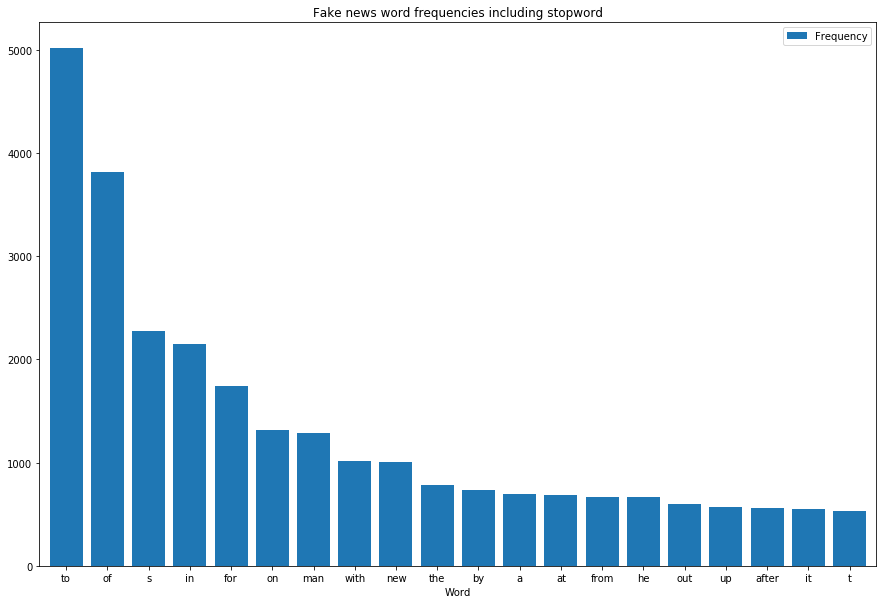

In [0]:
Words = (FakeDataFrame.headline
           .str.lower()
           .replace([r'\|'], [''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
FakeResult = pd.DataFrame(Counter(Words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print('False news word frequencies including Stopwords:')
print('=' * 60)
print(FakeResult)
print('=' * 60)

# plot
FakeResult.plot.bar(title='Fake news word frequencies including stopword',rot=0,figsize=(15,10), width=0.8)

Real news word frequencies excluding Stopwords:
         Frequency
Word              
trump         1446
new            680
donald         458
says           349
women          317
one            268
u              265
year           244
first          242
man            241
people         241
world          241
obama          235
day            226
make           217
gop            215
like           213
black          208
get            207
clinton        203


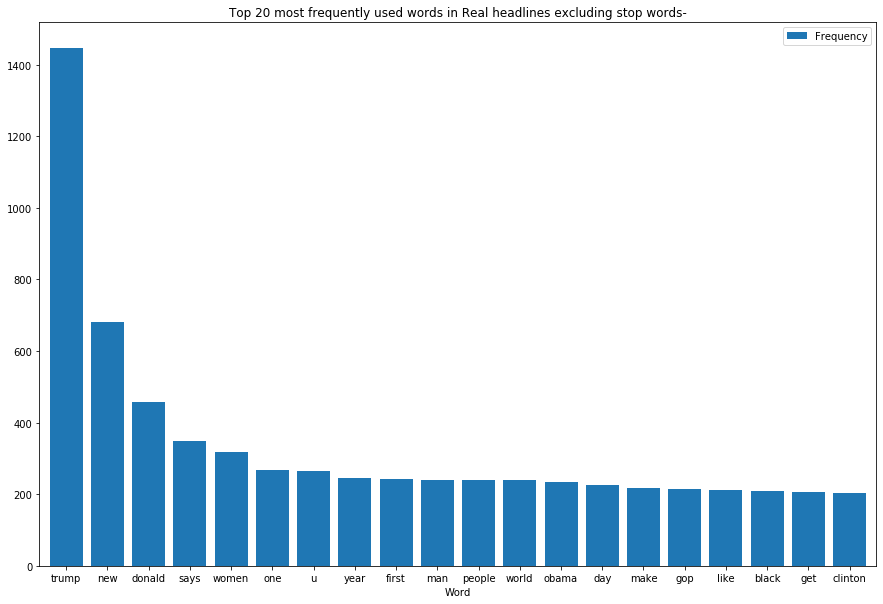

In [0]:
TrueDataFrame = DataFrame.loc[DataFrame['is_sarcastic'] == 0]
Words = (TrueDataFrame.headline
           .str.lower()
           .replace([r'\|', RegexStopWords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
TrueResult = pd.DataFrame(Counter(Words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print('Real news word frequencies excluding Stopwords:')
print('=' * 60)
print(TrueResult)
print('=' * 60)

# plot
TrueResult.plot.bar(title='Top 20 most frequently used words in Real headlines excluding stop words-',rot=0, figsize=(15,10), width=0.8)

Real news word frequencies including Stopwords:
       Frequency
Word            
the         4753
to          4092
s           3365
a           2520
of          2478
in          2449
for         1896
and         1669
is          1510
trump       1446
on          1359
with         947
you          894
this         705
t            699
new          680
from         665
at           651
how          650
about        646


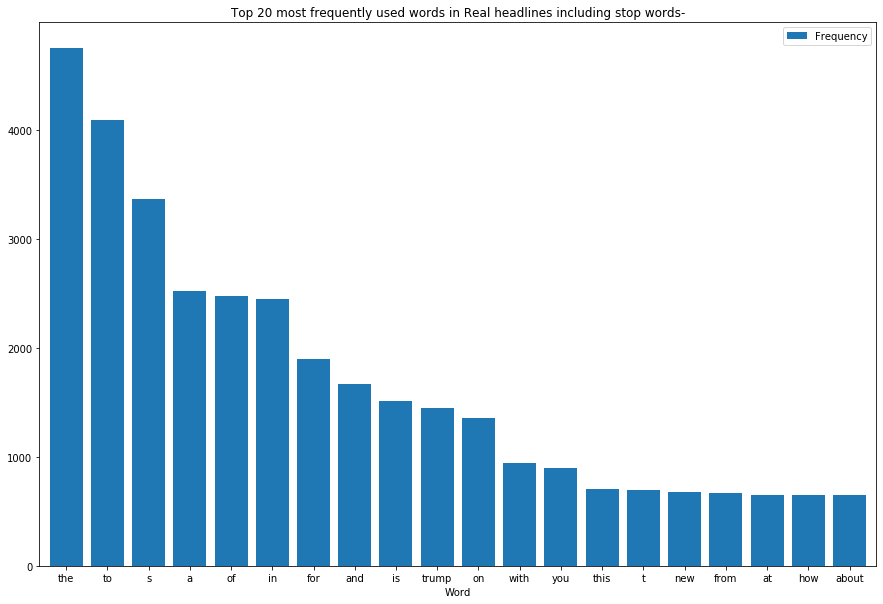

In [0]:
Words = (TrueDataFrame.headline
           .str.lower()
           .replace([r'\|'], [''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
TrueResult = pd.DataFrame(Counter(Words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print('Real news word frequencies including Stopwords:')
print('=' * 60)
print(TrueResult)
print('=' * 60)

# plot
TrueResult.plot.bar(title='Top 20 most frequently used words in Real headlines including stop words-',rot=0, figsize=(15,10), width=0.8)

In [0]:
TrueDataFrame = DataFrame.loc[DataFrame['is_sarcastic'] == 0]
TrueDataFrame['Length'] = (TrueDataFrame['headline']).str.len()
print(TrueDataFrame.Length.head())
SubTrueDataFrame = TrueDataFrame.nlargest(20,'Length')
print (SubTrueDataFrame.Length)

1    79
2    49
5    20
6    42
9    34
Name: Length, dtype: int64
23598    228
21199    154
26943    152
25785    149
17751    145
28081    142
2203     141
20776    141
28201    138
1419     137
2996     137
5830     137
25682    136
7492     134
26992    132
28467    128
13045    127
105      124
4592     124
20594    124
Name: Length, dtype: int64


In [0]:
FalseDataFrame = DataFrame.loc[DataFrame['is_sarcastic'] == 1]
FalseDataFrame['Length'] = (FalseDataFrame['headline']).str.len()
print(FalseDataFrame.Length.head())
SubFalseDataFrame = FalseDataFrame.nlargest(20,'Length')
print (SubFalseDataFrame.Length)

0    61
3    52
4    61
7    88
8    73
Name: Length, dtype: int64
7302     926
2146     254
16588    238
24815    237
26597    212
27972    199
4688     190
25133    165
2426     159
11585    154
5032     151
24704    148
1237     145
13154    144
9560     143
11690    143
17412    143
17842    143
26019    142
26020    141
Name: Length, dtype: int64


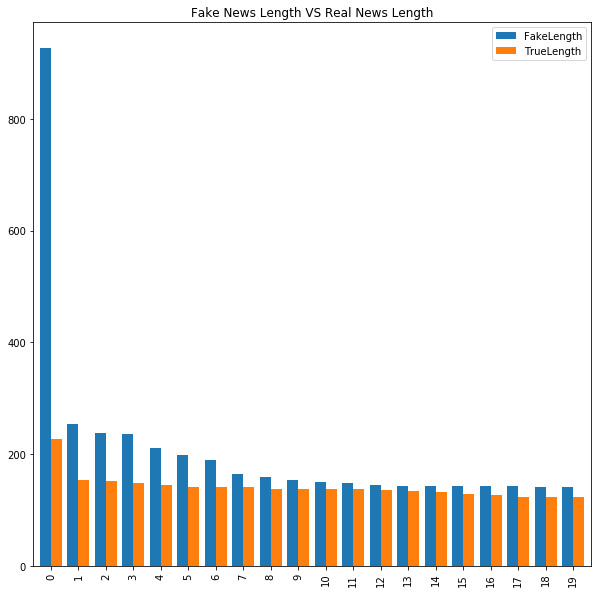

In [0]:
import numpy as np
#ConcatSubDataFrame = pd.DataFrame(index=index, columns=["TrueLength","FakeLength"])
#df_ = df_.fillna(0)
ConcatSubDataFrame = pd.DataFrame()
ConcatSubDataFrame['TrueLength']=SubTrueDataFrame['Length'].values
ConcatSubDataFrame['TrueLength']=SubTrueDataFrame['Length'].to_numpy()
ConcatSubDataFrame['FakeLength']=SubFalseDataFrame['Length'].values
ConcatSubDataFrame['FakeLength']=SubFalseDataFrame['Length'].to_numpy()
# df.rename(columns={"A": "a"
#test.merge(test2,on='Length')
#ConcatDataFrame = pd.concat([test['Length'],test2['Length']],axis=1,ignore_index=True)

ConcatSubDataFrame.head()
ConcatSubDataFrame[['FakeLength','TrueLength']].plot(kind='bar',title= 'Fake News Length VS Real News Length',figsize=(10,10), width=0.8)

plt.show()


In [0]:
def getArticlePublisher(row):
    if 'theonion' in row:
        return 'Onion'
    elif 'huffingtonpost' in row:
        return 'HuffingtonPost'
    else:
        return 'Not_both'

In [0]:
DataFrame['Publisher'] = DataFrame['article_link'].apply(getArticlePublisher)

#Checking if there are other Publishers than HP and Onion
check_value = DataFrame[DataFrame['Publisher'].str.contains('Not_both')]
print(check_value.count())


DataFrame.groupby(['Publisher','is_sarcastic']).count()
check_data = DataFrame.head()
check_data

pd.isnull(check_data['Publisher']).any()

is_sarcastic    0
headline        0
article_link    0
Publisher       0
dtype: int64


False

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Number of articles')

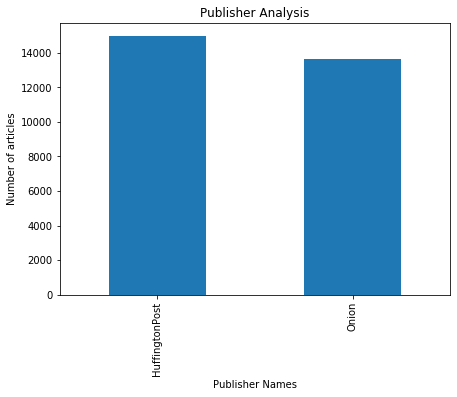

In [0]:
##top 20 most frequent words of false headlines
BarGraphData = DataFrame['Publisher'].value_counts().plot(kind='bar',
                                    figsize=(7,5),
                                    title="Publisher Analysis")
print(BarGraphData)
BarGraphData.set_xlabel("Publisher Names")
BarGraphData.set_ylabel("Number of articles")

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Number of articles')

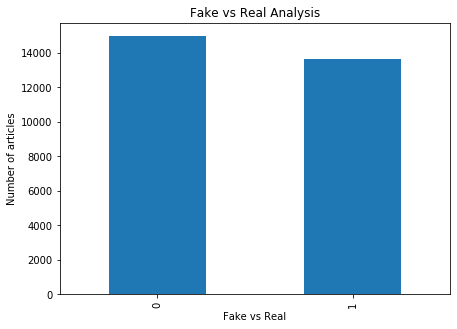

In [0]:
BarGraphData = DataFrame['is_sarcastic'].value_counts().plot(kind='bar',
                                    figsize=(7,5),
                                    title="Fake vs Real Analysis")

print(BarGraphData)
BarGraphData.set_xlabel("Fake vs Real")
BarGraphData.set_ylabel("Number of articles")

In [0]:
check_data=DataFrame.head()
check_data.head()
DataFrame= DataFrame.drop(['Publisher'],1)
check_data=DataFrame.head()
check_data.head()

# Setting features and labels
features = DataFrame['headline']
labels = DataFrame['is_sarcastic']
features.head()

0    thirtysomething scientists unveil doomsday clo...
1    dem rep  totally nails why congress is falling...
2    eat your veggies    deliciously different recipes
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word  strea...
Name: headline, dtype: object

In [0]:
# vectorizing the data

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features = 10000, stop_words='english')
#feature2=features
features = list(features)
features = tv.fit_transform(features).toarray()
print(tv.get_feature_names()[-20:])
print(tv.vocabulary_)
# getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .25, random_state = 45)

['yorkers', 'yosemite', 'young', 'younger', 'youth', 'youths', 'youtube', 'zayn', 'zealand', 'zen', 'zero', 'zika', 'zimmerman', 'zinke', 'zip', 'zone', 'zones', 'zoo', 'zoologists', 'zuckerberg']
{'scientists': 7805, 'unveil': 9443, 'doomsday': 2706, 'clock': 1666, 'hair': 3917, 'loss': 5312, 'dem': 2420, 'rep': 7375, 'totally': 9115, 'nails': 5851, 'congress': 1885, 'falling': 3228, 'short': 8062, 'gender': 3629, 'racial': 7069, 'equality': 3014, 'eat': 2841, 'different': 2567, 'recipes': 7200, 'weather': 9757, 'prevents': 6855, 'liar': 5157, 'getting': 3661, 'work': 9901, 'mother': 5772, 'comes': 1763, 'pretty': 6851, 'close': 1669, 'using': 9486, 'word': 9898, 'streaming': 8621, 'correctly': 2019, 'white': 9817, 'inheritance': 4516, 'ways': 9743, 'file': 3336, 'taxes': 8888, 'stress': 8627, 'richard': 7535, 'global': 3705, 'warming': 9698, 'donation': 2695, 'nearly': 5904, 'cost': 2028, 'failed': 3214, 'balloon': 621, 'trips': 9235, 'shadow': 7979, 'government': 3759, 'large': 5015

In [0]:
np.savetxt("features_test.csv", features_test, delimiter=",")

In [0]:
np.savetxt("features_train.csv", features_train, delimiter=",")
np.savetxt("labels_test.csv", features_train, delimiter=",")
np.savetxt("labels_train.csv", features_train, delimiter=",")

In [0]:
print(features_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
def m_cp(y_test):
    mcp = []
    for i in range(len(y_test)):
        mcp.append(0)
    print (mcp)
    return mcp

In [0]:
comparsion_val=[]
model_list =[]

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators = 10, random_state = 20)
random_forest_classifier.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

Random forest classifier
accuracy:   0.75416
[[3072  713]
 [1046 2324]]
Cross-validated mean 0.7341133260781927
Rightly classified: 5396
Wrongly classified:1759
Out of Sample Error: 0.02004460543822939
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

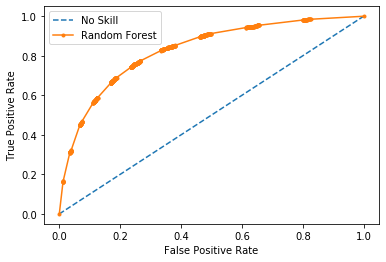

In [0]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Predicting Test set results
labels_pred_rfc = random_forest_classifier.predict(features_test)
accuracy_score_rfc = metrics.accuracy_score(labels_test, labels_pred_rfc)
print('=' * 60)
print("Random forest classifier")
print('=' * 60)
print("accuracy:   %0.5f" % accuracy_score_rfc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred_rfc)
print(cm)
kfold = KFold(n_splits=5, random_state=7)
result1 = cross_val_score(random_forest_classifier, features_train, labels_train, cv=kfold, scoring='accuracy')
comparsion_val.append(result1)
model_list.append("RFC")
result_rfc= result1.mean()
print("Cross-validated mean %s"%result_rfc)
oss_rfc = result_rfc-accuracy_score_rfc if result_rfc>accuracy_score_rfc  else accuracy_score_rfc-result_rfc
print("Rightly classified: %s" % (cm[0][0]+cm[1][1]))
print("Wrongly classified:%s" % (cm[0][1]+cm[1][0]))
print("Out of Sample Error: %s" %oss_rfc)
mcp =[]
mcp = m_cp(labels_test)
# predict probabilities
labels_pred_rfc = random_forest_classifier.predict_proba(features_test)
# keep probabilities for the positive outcome only
labels_pred_rfc = labels_pred_rfc[:, 1]

# calculate scores
ns_auc = roc_auc_score(labels_test, mcp)
labels_auc = roc_auc_score(labels_test, labels_pred_rfc)
print('No skill -> No outcomes, majority outcomes', ns_auc)
print('Positive come -> positive outcomes', labels_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(labels_test, mcp)
lr_fpr, lr_tpr, _ = roc_curve(labels_test, labels_pred_rfc)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
# Using linear support vector classifier
linear_svc = LinearSVC()
calibrated_svc = CalibratedClassifierCV(linear_svc,
                                        method='sigmoid',  #sigmoid will use Platt's scaling. Refer to documentation for other methods.
                                        cv=3)

# training the model
calibrated_svc.fit(features_train, labels_train)


CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=3, method='sigmoid')

Linear SVC
accuracy:   0.797
[[3131  654]
 [ 799 2571]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

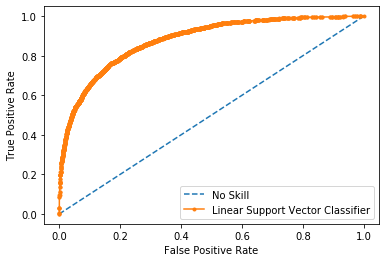

In [0]:
print('=' * 60)
print("Linear SVC")
print('=' * 60)
# Predicting Test set results
labels_pred_svc = calibrated_svc.predict(features_test)
AccuracyScore2 = metrics.accuracy_score(labels_test, labels_pred_svc)
print("accuracy:   %0.3f" % AccuracyScore2)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred_svc)
print(cm)
mcp =[]
mcp = m_cp(labels_test)
# predict probabilities
labels_pred_svc = calibrated_svc.predict_proba(features_test)
# keep probabilities for the positive outcome only
labels_pred_svc = labels_pred_svc[:, 1]

# calculate scores
ns_auc = roc_auc_score(labels_test, majority_class_predict)
labels_auc = roc_auc_score(labels_test, labels_pred_svc)
print('No skill -> No outcomes, majority outcomes', ns_auc)
print('Positive come -> positive outcomes', labels_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(labels_test, majority_class_predict)
lr_fpr, lr_tpr, _ = roc_curve(labels_test, labels_pred_svc)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Linear Support Vector Classifier')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
from sklearn.naive_bayes import GaussianNB
# Using Gaussuan Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(features_train, labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Gaussian Naive Bayes
accuracy:   0.689
[[3145  640]
 [1582 1788]]
Cross-validated mean 0.7883433965303409
Rightly classified:4933
Wrongly classified:2222
Out of Sample Error: 0.09889545802579869
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

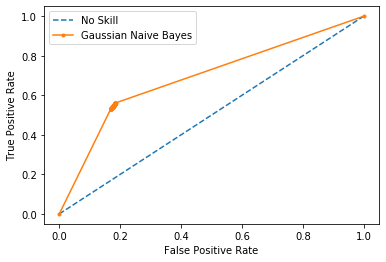

In [0]:
print('=' * 60)
print("Gaussian Naive Bayes")
print('=' * 60)

# Predicting Test set results
labels_pred_gnb = gaussian_nb.predict(features_test)
accuracy_score_gnb = metrics.accuracy_score(labels_test, labels_pred_gnb)
print("accuracy:   %0.3f" % accuracy_score_gnb)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred_gnb)
print(cm)
kfold = KFold(n_splits=5, random_state=7)
result2 = cross_val_score(gaussian_nb, features_train, labels_train, cv=kfold, scoring='accuracy')
comparsion_val.append(result2)
model_list.append("GNB")
kfold = KFold(n_splits=2, random_state=7)
result_gnb= result.mean()
print("Cross-validated mean %s"%result_gnb)
oss_gnb = result_gnb-accuracy_score_gnb if result_gnb>accuracy_score_gnb  else accuracy_score_gnb-result_gnb
print("Rightly classified:%s" % (cm[0][0]+cm[1][1]))
print("Wrongly classified:%s" % (cm[0][1]+cm[1][0]))
print("Out of Sample Error: %s" %(oss_gnb))

mcp =[]
mcp = m_cp(labels_test)
# predict probabilities
labels_pred_gnb = gaussian_nb.predict_proba(features_test)
# keep probabilities for the positive outcome only
labels_pred_gnb = labels_pred_gnb[:, 1]

# calculate scores
ns_auc = roc_auc_score(labels_test, mcp)
labels_auc = roc_auc_score(labels_test, labels_pred_gnb)
print('No skill -> No outcomes, majority outcomes', ns_auc)
print('Positive come -> positive outcomes', labels_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(labels_test, mcp)
lr_fpr, lr_tpr, _ = roc_curve(labels_test, labels_pred_gnb)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Gaussian Naive Bayes')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression
accuracy:   0.795
[[3161  624]
 [ 843 2527]]
Cross-validated mean 0.7857344006335548
Rightly classified:5688
Wrongly classified:1467
Out of Sample Error: 0.009234152825564723
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

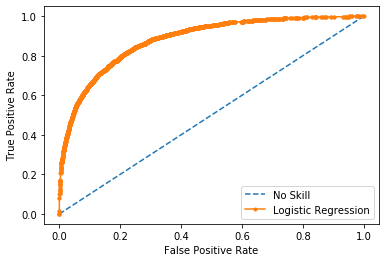

In [0]:
print('=' * 60)
print("Logistic Regression")
print('=' * 60)
# Predicting Test set results
labels_pred_lr = logistic_regression.predict(features_test)
accuracy_score_lr = metrics.accuracy_score(labels_test, labels_pred_lr)
print("accuracy:   %0.3f" % accuracy_score_lr)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred_lr)
print(cm)
kfold = KFold(n_splits=5, random_state=7)
result3 = cross_val_score(logistic_regression, features_train, labels_train, cv=kfold, scoring='accuracy')
result_lr= result3.mean()
comparsion_val.append(result3)
model_list.append("LR")
print("Cross-validated mean %s"%result_lr)
oss_lr = result_lr-accuracy_score_lr if result_lr>accuracy_score_lr  else accuracy_score_lr-result_lr
print("Rightly classified:%s" % (cm[0][0]+cm[1][1]))
print("Wrongly classified:%s" % (cm[0][1]+cm[1][0]))
print("Out of Sample Error: %s" %oss_lr)

mcp =[]
mcp = m_cp(labels_test)
# predict probabilities
labels_pred_lr = logistic_regression.predict_proba(features_test)
# keep probabilities for the positive outcome only
labels_pred_lr = labels_pred_lr[:, 1]

# calculate scores
ns_auc = roc_auc_score(labels_test, mcp)
labels_auc = roc_auc_score(labels_test, labels_pred_lr)
print('No skill -> No outcomes, majority outcomes', ns_auc)
print('Positive come -> positive outcomes', labels_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(labels_test, mcp)
lr_fpr, lr_tpr, _ = roc_curve(labels_test, labels_pred_lr)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB()
multinomial_nb.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Mulinomial Naive Bayes
accuracy:   0.797
[[3149  636]
 [ 816 2554]]
Cross-validated mean 0.7883433965303409
Rightly classified:5703
Wrongly classified:1452
Out of Sample Error: 0.008721592987478766
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

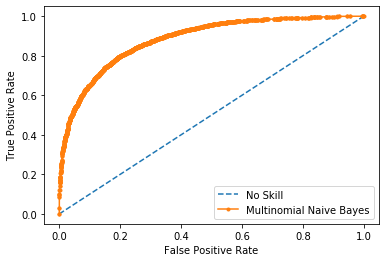

In [0]:
print('=' * 60)
print("Mulinomial Naive Bayes")
print('=' * 60)
# Predicting Test set results
labels_pred_mnb = multinomial_nb.predict(features_test)
accuracy_score_mnb = metrics.accuracy_score(labels_test, labels_pred_mnb)
print("accuracy:   %0.3f" % accuracy_score_mnb)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred_mnb)
print(cm)
kfold = KFold(n_splits=5, random_state=7)
result4 = cross_val_score(multinomial_nb, features_train, labels_train, cv=kfold, scoring='accuracy')
result_mnb= result4.mean()
comparsion_val.append(result4)
model_list.append("MNB")
print("Cross-validated mean %s"%result_mnb)
oss_mnb = result_mnb-accuracy_score_mnb if result_mnb>accuracy_score_mnb  else accuracy_score_mnb-result_mnb
print("Rightly classified:%s" % (cm[0][0]+cm[1][1]))
print("Wrongly classified:%s" % (cm[0][1]+cm[1][0]))
print("Out of Sample Error: %s" %oss_mnb)
mcp =[]
mcp = m_cp(labels_test)
# predict probabilities
labels_pred_mnb = multinomial_nb.predict_proba(features_test)
# keep probabilities for the positive outcome only
labels_pred_mnb = labels_pred_mnb[:, 1]

# calculate scores
ns_auc = roc_auc_score(labels_test, majority_class_predict)
labels_auc = roc_auc_score(labels_test, labels_pred_mnb)
print('No skill -> No outcomes, majority outcomes', ns_auc)
print('Positive come -> positive outcomes', labels_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(labels_test, majority_class_predict)
lr_fpr, lr_tpr, _ = roc_curve(labels_test, labels_pred_mnb)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Multinomial Naive Bayes')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

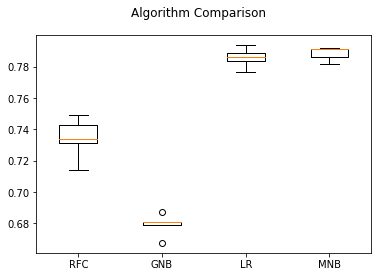

In [0]:
plot_figure = plt.figure()
plot_figure.suptitle('Algorithm Comparison')
axis = plot_figure.add_subplot(111)
plt.boxplot(comparsion_val)
axis.set_xticklabels(model_list)
plt.show()

In [0]:
import pickle
#pickle.dump(multinomial_nb, 'MachineLearing_Assignmet_test.tar.gz')
pickle.dump(multinomial_nb, open('multinomial_nb.pickle', 'wb'))
pickle.dump(logistic_regression, open('logistic_regression.pickle', 'wb'))
pickle.dump(gaussian_nb, open('gaussian_nb.pickle', 'wb'))
pickle.dump(random_forest_classifier, open('random_forest_classifier.pickle', 'wb'))

In [0]:
loaded_model = pickle.load(open('/content/multinomial_nb.pickle', 'rb'))
result = loaded_model.score(features_test, labels_test)
print(result)

0.7970649895178197
